# K-Median
k-median: find center partitions $c_1, c_2, …, c_k$ to minimize 
 $\sum min_{j \in\{i, …,k\}}d(x^i, c_j)$
 
Given a set of datapoints ${x_1, ..., x_n}$ and a positive number $K$, find the clusters $C_1, ..., C_k$ that minimize

\begin{equation}
J = \sum_{i=1}^N \, \sum_{j=1}^K \, z_{ij} \, | x_i - \mu_j |
\end{equation}

where:  
- $z_{ij} \in \{0,1\}$ defines whether of not datapoint $x_i$ belongs to cluster $C_j$
- $\mu_j$ denotes the cluster center of cluster $C_j$
- $| \, |$ denotes the Euclidean distance


Since every point only contributes to the inertia calculation where it belongs to that cluster.

To minimize the summation of K clusters' inertia equals to minimize the inertia of each cluster.

$$I = \sum_k^K{I_k}$$

Suppose all data points have J features, there are M data points belong to one specific cluster k.

$$I_k = \sum_{j=1}^{J}{\sum_{i=1}^{M}{|x_{i}^{j}-\mu_{k}^{j} |} } $$

Take derivative with respect to $\mu_k^j$ and let it equals 0:

$$\frac{\partial I_k}{\partial \mu_k^j} = \sum_{i}^{M}{\frac{|x_{i}^{j}-\mu_{k}^{j}  |}{x_{i}^{j}-\mu_{k}^{j}} } = 0$$

Giving: 
$\mu_k^j$ is the median of $x_k^j$


$J$ concaves up. When $\mu_k^j$ is the median of $x_k^j$, J got the local minimum.


Plus: we can also have:

\begin{equation}
\frac{\partial I_k}{\partial \mu_k} = \sum_j^{J}{\sum_{i}^{M}{\frac{|x_{i}^{j}-\mu_{k}^{j}  |}{x_{i}^{j}-\mu_{k}^{j}}}}\\
\frac{\partial I}{\partial \mu} = \sum_k^{K}{\sum_j^{J}{\sum_{i}^{M}{\frac{|x_{i}^{j}-\mu_{k}^{j}|}{x_{i}^{j}-\mu_{k}^{j}}}}} \\
= \sum_k^{K}{\sum_j^{J}{\sum_{i}^{N} z_{ik}{\frac{|x_{i}^{j}-\mu_{k}^{j}|}{x_{i}^{j}-\mu_{k}^{j}}}} }
\end{equation}


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances

from utils import plot_decision_boundaries
data = pd.read_csv('data.csv',header=None).values
data.shape

(150, 2)

In [2]:
def _random_init(X, n_clusters, random_state):
    center_idx = random_state.permutation(X.shape[0])[:n_clusters]
    centers = X[center_idx]
    return centers
    
def _init_centroids(X, n_clusters, random_state): 
    centers = _random_init(X, n_clusters, random_state)
    return centers
  

def _assign_labels(X, centers):
    # centers are data points
    dist = pairwise_distances(X, centers,metric='cityblock')
    assignments = np.argmin(dist,axis=1)
    return assignments

def _get_centers(X, assignments):
    new_centers = []
    for i in np.unique(assignments):
        new_centers.append(np.median(X[assignments == i],axis=0))
    return np.array(new_centers)

def _kmedian(X, n_clusters, random_state, max_iter = 240):
    centers = _init_centroids(X, n_clusters, random_state)
    distances = np.zeros(shape=(X.shape[0],), dtype=X.dtype)

    for i in range(max_iter):
        centers_old = centers.copy()
        # E-step of EM
        assignments = _assign_labels(X, centers)
        # M-step of EM
        centers = _get_centers(X, assignments)

    return centers, assignments

In [3]:
class KMedian():
    def __init__(self,n_clusters:int, random_seed:int = 65):
        self.n_clusters = n_clusters
        self.random_state = np.random.RandomState(random_seed)      
        
    def fit(self,X):
        #X_mean = X.mean(axis=0)
        #X -= X_mean
        self.cluster_centers_, self.labels_ = _kmedian(X=X,
                                                            n_clusters = self.n_clusters,
                                                            random_state = self.random_state)

        return self
    
    def fit_predict(self,X):
        return self.fit(X).labels_
    
    def predict(self, X):
        #X_mean = X.mean(axis=0)
        #X -= X_mean
        if self.labels_ is not None:
            return _assign_labels(X, self.cluster_centers_)
        

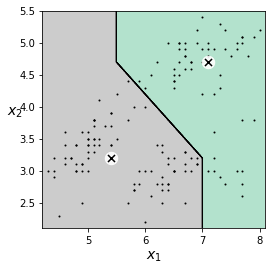

In [4]:
kmedian = KMedian(2,24)
kmedian.fit(data)
plt.figure(figsize=(4, 4))
plot_decision_boundaries(kmedian, data)
plt.show()

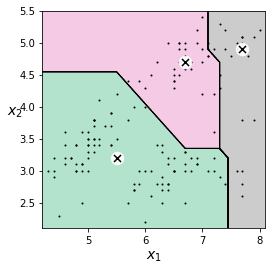

In [5]:
kmedian = KMedian(3,60)
kmedian.fit(data)
plt.figure(figsize=(4, 4))
plot_decision_boundaries(kmedian, data)
plt.show()

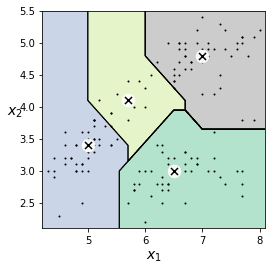

In [6]:
kmedian = KMedian(4,24)
kmedian.fit(data)
plt.figure(figsize=(4, 4))
plot_decision_boundaries(kmedian, data)
plt.show()

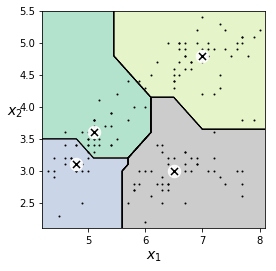

In [7]:
kmedian = KMedian(4,2)
kmedian.fit(data)
plt.figure(figsize=(4, 4))
plot_decision_boundaries(kmedian, data)
plt.show()